In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 07. 统计学入门
本章我们将研究如何获取数据，正确对数据进行抽样，以避免在实验中引入偏差。我们还将使用统计学方法对数据进行量化和可视化。通过使用$z$分数和经验法则，你将学会如何对数据进行标准化，以便更好地进行分析和数据可视化。 

## 7.1 什么是统计学
统计学的目的是对我们所处的现实世界进行解释和建模。为了做到这一点，我们需要了解`总体`(population)的概念。

我们将`总体`定义为某类试验、事件或模型的全体。通常情况下，`总体`是我们真正研究的对象。

我们将`参数`(parameter)定义为描述总体某一特征的度量(数值型)。比如我们想知道所有员工中使用了违禁药品的人的比例，这个问题的结果就被称为`参数`。

假设我们经调查发现，1000名员工中有100人使用了违禁药品，那么参数值就等于$10\%$。

然而，如果员工数量超过10000人，我们很难追踪每一位员工的违禁药品使用情况。当遇到这种情况时，我们已经不可能直接求解参数，而只能对参数值进行估计。

为了估计参数值，我们需要从总体中抽取`样本`(sample)。

我们将`样本`定义为总体的子集。我们可能只调查1000名员工中的200名，假设有26人使用了违禁药品，那么违禁药品使用率等于$13\%$。因为我们并没有调查所有人，$13\%$仅仅是我们估计的参数值。

**上面这个过程就叫`统计`。**

我们可以认为统计是描述总体中样本的某个特征的方法。

统计就是对参数值的估计。统计是通过研究总体子集的特征，描述总体特征的度量值。

这就是统计学的世界—从总体中抽取样本，再对样本进行检验。所以，当你下一次再看到统计数字时请记住，它是总体中某个样本的特征，而不是总体。

## 7.2 如何获取数据

### 7.2.1 获取数据
有两种获取分析所需数据的方法：`观察法`和`实验法`。 这两种方法各有利弊，适合不同类型的分析。

##### 观察法
我们可以通过观察法持续记录被观测事件的特征值，但又不影响事件的发生。比如，我们通过追踪软件记录网站访客的行为习惯—在特定页面的访问时长、广告点击率等，追踪软件并不影响访客的行为。

观察法是最常见的收集数据的方法，因为它操作起来非常简单，你需要做的仅仅是观察和收集。但观察法限制了可收集的数据类型，因为作为观察者，我们对整个实验环境缺乏控制力，只能观察和收集自然发生的行为。如果我们希望主动诱发某种行为并进行观察，那可能并不适合使用观察法。

##### 实验法
实验法包含一组实验方法和实验对象的反映，实验对象也被称为实验单元。大部分科学实验均使用实验法收集数据。实验组织者将人群分为两组或多组，其中一组为实验组，另一组为对照组/控制组。

对照组暴露在特定环境中并被仔细观察。与此同时，实验组暴露在另一个不同的环境中并被仔细观察。实验组织者将两组数据对比分析后，决定哪个实验环境更加有利。

在市场营销活动中，假设我们让一半用户使用经过特殊设计的登录页面(网页A)， 然后统计这些用户是否进行了注册。同时，我们让另一半用户使用不同的登录页面(网页B)，然后统计这些用户是否进行了注册。通过对比两个页面的注册率，我们可以决定哪个网页的表现更好。这种方法叫作`A/B测试`。

下面我们用Python演示具体的案例。假设某项`A/B测试`获得的数据如下：
```python
results = [['A', 1], ['B', 1], ['A', 0], ['A', 0]...]
```

列表的每个对象表示一个用户，每个用户有以下两个特征：
+ 登录网站的页面，用字母A或B表示
+ 是否完成了注册(0表示否，1表示是)

我们可以对原始数据进行聚合，得到以下两组数据：
```python
users_exposed_to_A = [] 
users_exposed_to_B = []
```

对所有的测试结果进行迭代，将每个结果分派到相应的类别中：
```python
for website, converted in results: 
    if website == 'A': 
        users_exposed_to_A.append(converted) 
    elif website == 'B': 
        users_exposed_to_B.append(converted)
```

计算网页的访问用户数：
```python
len(users_exposed_to_A) == 188 #number of people exposed to website A 
len(users_exposed_to_B) == 158 #number of people exposed to website B
```

计算注册用户数：
```python
sum(users_exposed_to_A) == 54 # people converted from website A 
sum(users_exposed_to_B) == 48 # people converted from website B
```

没有注册的用户数：
```python
len(users_exposed_to_A) - sum(users_exposed_to_A) == 134
len(users_exposed_to_B) - sum(users_exposed_to_B) == 110
```

对上述统计结果进行整理和汇总得到了`A/B测试`的结果：
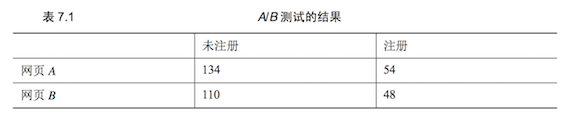

我们可以快速计算每个网页的转化率：
+ 网页A的转化率：$54/(134+54)=0.288$
+ 网页B的转化率：$48/(110+48)=0.300$

网页A和B的转化率确实有所不同，但差异不大。网页B的转化率看起来高于A，我们是否可以认为网页B的转化率显著高于网页A呢？不可以！为了得到`A/B测试`的`统计显著性`(statistical significance)，我们需要对其进行假设检验。

在下一章，我们将对各种假设检验方法进行详细介绍，也会采用最合适的假设检验方法继续研究本 案例。

## 7.3 数据抽样
统计指标体现的是总体中某个样本的特征值。有两种最常见的数据抽样方法：`概率抽样`和`随机抽样`。

### 7.3.1 概率抽样
`概率抽样`(probability sampling)指总体中每个元素以给定的概率被抽中。每个元素被抽中的概率既可以相等，也可以不相等。最简单也是最常见的概率抽样方法是`随机抽样`(random sampling)。

### 7.3.2 随机抽样
假设我们正在进行`A/B测试`，希望将用户分为A组和B组。以下是3个分组建议：
+ 根据用户地址进行分类。西海岸的用户归为A组，东海岸的用户归为B组
+ 根据用户访问网站时间进行分类。晚上7点至早上4点的用户归为A组，其余用户归为B组
+ 完全随机分类。每个新用户按照`50/50`的比率，平均分到A组和B组

前两种方法确实可以对用户进行分组，也容易实施。但是它们有一个根本的缺陷面临`样本偏差`(sampling bias)的风险。

当抽取样本的方式对分析结果具有较大影响时，我们称存在`样本偏差`。

我们很容易解释为什么前两种方法面临样本偏差风险。当我们按照用户的地理位置或者登录时间进行分类时，我们在实验中引入了`干扰因子`(confounding factor)， 导致我们对实验结果缺乏掌控力。

`干扰因子`指间接影响实验结果的隐性变量。简单理解，`干扰因子`是未被作为分析对象，但却影响着分析结果的变量。

在本例中，第1种分类方法没有考虑到地理因素对`A/B测试`结果的潜在影响。比如，如果网页A本身就对西海岸用户没有吸引力，那么西海岸这个地理位置将影响测试结果， 导致我们无法区分`A/B测试`结果是由用户地理位置造成的，还是网站本身造成的。

第2种分类方法可能引入的干扰因子是时间。比如，网页B在夜间环境的使用效果较好(网页A则恰恰相反)，导致用户离开网站A仅仅是因为访问的时间不合适。

`随机抽样`指总体中每一个元素被抽中的机会是相等的。在随机抽样中，总体中的每个元素都有相同的概率成为样本的一员，所以有效避免了引入干扰因子。

### 7.3.3 不等概率抽样
等概率抽样也有可能引起样本偏差。

假设我们想了解员工的幸福指数，我们不可能对每位员工进行调查，所以我们需 要抽取一个样本。数据小组推荐使用随机抽样，但是，小组中有人提出了一个善意的疑问：“有谁知道员工的男女组成比例？”这个问题非常重要，因为性别确实是一个干扰因子。数组小组研究后发现，公司员工中男性占比$75\%$，女性占比$25\%$。这意味着如果我们使用随机抽样，样本会有同样的偏倚—明显偏向男性。

为了防止出现这种情况，我们可以刻意在样本中增加女性的数量，以使样本的性别构成趋向平衡。表面上看，在随机抽样中引入偏好并不是一个好主意，但在实际应用中，轻度使用不等概率抽样，消除性别、种族、残疾等系统性偏差是非常必要且恰当的。

## 7.4 如何描述统计量
一旦我们得到了样本，就可以量化统计结果。以下是一些常用的统计量。

### 7.4.1 测度中心
我们定义数据集的中心为`测度中心`(measure of center)。`测度中心`是对(大型)数据集进行归纳、概括，以便能够方便地进行交流的一种方式。比如，西雅图平均的降雨量和欧洲男性的平均身高都可以用对应数据集的测度中心表示。

`测度中心`是位于数据集`中间位置`的值。然而，不同人对`中间位置`有不同的理解。因此，测度中心有多种计算方法。

##### 算术平均值
第一种测度中心叫`算术平均值`。算术平均值等于数据集中所有元素之和除以元素的个数，它是最常用的测度中心，但也有缺点。比如：

In [2]:
np.mean([11, 15, 17, 14])

14.25

数据集的平均值是`14.25`，所有的数据点都非常接近平均值。但是，如果我们新增一个数据点`31`：

In [3]:
np.mean([11, 15, 17, 14, 31])

17.6

新增加的数据点对数据集的平均值产生了较大影响。这是因为算术平均值对`离群值`(outliers)非常敏感。

另一个常用的测度中心是`中位数`(median)。`中位数`是已排序数据集中处于中间位置的值。

In [4]:
np.median([11, 15, 17, 14])

14.5

In [5]:
np.median([11, 15, 17, 14, 31])

15.0

在数据集中新增的数并没有对中位数产生较大影响。这是因为中位数对离群值不敏感。

> 当数据集有较多离群值时，使用中位数作为测度中心比较合理。相反，如果数据集没有较多离群值，且数据点较为集中，那么使用平均值作为测度中心就是一 个较好的选择

### 7.4.2 变异测度
测度中心用于量化数据的中心，`变异测度`用于测量数据离散程度。

假设我们随机抽取24个Facebook用户，并统计他们的好友数：

In [6]:
friends = [109, 1017, 1127, 418, 625, 957, 89, 950, 946, 797, 981, 125, 455, 731, 1640, 485, 1309, 472, 1132, 1773, 906, 531, 742, 621]

np.mean(friends)

789.0833333333334

根据此样本，我们可以认为每个Facebook用户平均拥有的好友数量是789个。但是，在那些有89个好友或者1600个好友的人看来，这个数字并不合理。事实上，只有极个别用户的好友数接近789。

我们试试中位数：

In [7]:
np.median(friends)

769.5

列表的中位数非常接近平均值。中位数仍然无法体现数据点之间的巨大差异。

事实上，统计学家专门用`变异测度`衡量数据点之间的差异。最简单的变异测度是`区间`(range)。区间等于数据集最大值减去最小值：

In [8]:
np.max(friends) - np.min(friends)

1684

`区间`量化了两个极值之间的距离。实际上，区间在实践中的应用场景较少，但仍有其重要作用。比如在涉及科学测量和安全测量的场景之中，我们可能会非常关心离群值的离散程度。

假设汽车厂商希望测量安全气囊打开所花费的时间。虽然也可以用平均值进行衡量， 但汽车厂商同样关心安全气囊打开所需的最长时间和最短时间，因为这意味着生和死的区别！

回到Facebook案例中，我们已经知道数据集的区间是`1684`，但我们仍不确定它是不是描述数据分散程度的最好指标。

最常用的变异测度是`标准差` (standard deviation)。`标准差`(用符号$s$表示)用于量化数据点偏离样本算术平均值的程度。通用公式是：
+ $s = \sqrt{\frac{\sum(x-\bar{x})^2}{n-1}}$

其中：
+ $s$是样本的标准差
+ $x$是样本的数据点
+ $\bar{x}$是样本的均值
+ $n$是样本所含数据点的数量

标准差公式是，先用样本中的每一个值减去样本的算术平均值，再将所有的差值分别平方后相加，然后除以样本数据点的数量，最后开平方。

除了分析标准差公式之外，我们还可以这样理解标准差。标准差公式派生于距离公式，因此，标准差本质上是计算数据点和算术平均值之间某种平均距离的公式。 我们再次仔细观察标准差公式，你会发现这是有道理的：
1. $x - \bar{x}$ ，我们得到数据点和样本均值的差异
2. $(x - \bar{x})^2$，我们为离群值赋予了更多权重，因为平方让差异变得更大
3. 对上一步得到的值相加后除以样本元素数量$n$，我们得到了每个数据点和样本均值的平均平方距离
4. 对上一步得到的值开平方，我们将结果转化为能够接受的尺度。因为我们在第2步将数据尺度变成了好友数的平方，对结果开平方后，又让数据尺度恢复到了和之前一致的尺度

回到Facebook案例，计算标准差过程如下：
+ $s = \sqrt{\frac{(109-789)^2+(1017-789)^2 + ... + (621-789)^2}{24}}$

用numpy计算：

In [9]:
np.std(friends)

425.1862255399261

`425`表示样本数据的离散程度，即`425`是每个数据点和均值间的平均距离，样本数据非常分散！

下面我们用条形图可视化展示样本数据、均值和标准差。每个柱子表示一个用户，柱子的高度表示该用户的好友数量：

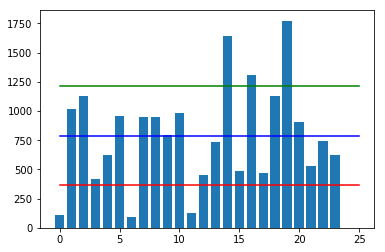

In [10]:
y_pos = range(len(friends))

plt.bar(y_pos, friends) 
plt.plot((0, 25), (789, 789), 'b-') 
plt.plot((0, 25), (789+425, 789+425), 'g-') 
plt.plot((0, 25), (789-425, 789-425), 'r-') 
plt.show()

蓝色横线为均值，红色横线为均值减去标准差($789−425=364$)，绿色横线为均值加上标准差($789+425=1214$)。图中大部分柱子都位于绿色横线和红色横线之间，离群值则在该区域之外。

> 需要强调的是标准差的单位和数据集本身的单位是一致的。所以，我们可以认为Facebook好友数的标准差是$425$个好友

另一种变异测度是之前介绍过的方差。方差和标准差的区别在于是否平方。

标准差和方差都可以衡量数据集的分散程度，它们和测度中心一起，构成了一组描述数据集特征的指标。但是，如果我们想比较两个不同数据集，甚至数据尺度完全不同的两个数据集的离散程度，就需要使用`变异系数`(coefficient of variation)。

### 7.4.3 变异系数
`变异系数`是样本标准差除以样本均值得到的比率。

通过该比率，我们可以对标准差进行标准化，从而对多个数据集进行横向比较。我们经常用这个指标对比数据尺度不同的样本的均值和分布情况。

##### 案例：员工薪酬
很难直接对比不同部门员工薪酬的标准差和均值。比如`表7.2`，`Mailroom`部门平均薪酬是`25000`美元，`Executive`部门平均薪酬是`124000`美元，两者相差了一个数量级：
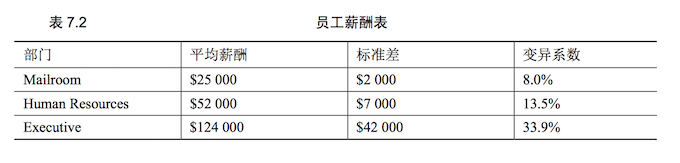

但是，通过`变异系数`我们可以发现，虽然`Executive`部门的人均薪酬较高，但薪酬差异也最大。这很可能是因为CEO的薪酬远远高于普通管理人员。反过来，虽然`Mailroom`部门的平均薪酬并不太高，但变异系数只有$8\%$，说明部门员工间的薪酬相差不大。

总之，通过变异测度，我们可以研究数据集更多的特征，找出能够包含大部分数据点的合理区间。

### 7.4.4 相对位置测度
我们可以将`测度中心`和`变异测度`结合在一起， 生成`相对位置测度`(measure of relative standing)。`相对位置测度`用于度量数据点相对于整个数据集的位置。

$z$分数(z-score)是统计学中最重要的统计量之一。$z$分数用于描述单个数据点和均值之间的距离。数据点$x$的$z$分数计算方法如下：
+ $z = \frac{x - \bar{x}}{s}$

其中：
+ $x$是样本中的数据点
+ $\bar{x}$是样本均值
+ $s$是样本标准差

标准差近似于数据点和均值之间的平均距离。$z$分数是标准化后的数据点到均值的距离，数据点减去均值，再除以标准差即可得到$z$分数。

在统计学中，$z$分数是将不同尺度数据正态化的一种非常重要的方式。

下面我们用$z$分数对Facebook好友案例进行标准化：

<BarContainer object of 24 artists>

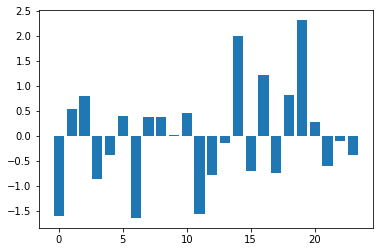

In [11]:
z_scores = [] 
m = np.mean(friends)
s = np.std(friends)

for friend in friends:
    z=(friend-m)/s 
    z_scores.append(z)

plt.bar(y_pos, z_scores)

上图使用$z$分数做成的柱形图，其中每一个柱子代表一个用户，柱子的高度是$z$分数。柱子的高度表示好友数和均值的差异程度。我们可以非常快速地找出好友数比平均值多或少的人。比如，横坐标0对应的人拥有的好友数低于平均值(他只有109个好友，均值是789个)。

我们之前曾绘制了3条辅助线：一条均值线，一条均值加标准差，一条均值减标准差。我们将这些值加入到$z$分数公式得到：
+ $\bar{x}的z分数 = \frac{\bar{x} - \bar{x}}{s} = \frac{0}{s} = 0$
+ $\bar{x}+s的z分数 = \frac{\bar{x} + s - \bar{x}}{s} = \frac{s}{s} = 1$
+ $\bar{x}-1的z分数 = \frac{\bar{x} - s - \bar{x}}{s} = \frac{-s}{s} = -1$

这不是巧合！当我们用$z$分数方法对数据集进行标准化时都会出现这种情况。我们在图中加入3条辅助线：

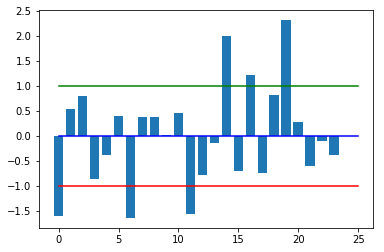

In [12]:
plt.bar(y_pos, z_scores) 
plt.plot((0, 25), (1, 1), 'g-') 
plt.plot((0, 25), (0, 0), 'b-') 
plt.plot((0, 25), (-1, -1), 'r-')
plt.show()

$z$分数是对数据标准化的重要方法，我们可以将整个数据集转换为同一尺度。比如，对于Facebook案例中出现的用户，假设我们有他们的幸福指数(介于0～1)， 数据如下：

In [13]:
friends = [109, 1017, 1127, 418, 625, 957, 89, 950, 946, 797, 981, 125, 455, 731, 1640, 485, 1309, 472, 1132, 1773, 906, 531, 742, 621] 
happiness = [.8, .6, .3, .6, .6, .4, .8, .5, .4, .3, .3, .6, .2, .8, 1, .6, .2, .7, .5, .3, .1, 0, .3, 1]

df = pd.DataFrame({'friends':friends, 'happiness':happiness}) 
df.head()

,friends,happiness
0,109,0.8
1,1017,0.6
2,1127,0.3
3,418,0.6
4,625,0.6


数据集有两个不同尺度的列。为解决这一差异，我们使用`scikit-learn`内置的数据预处理包对数据集进行简单的标准化：

In [14]:
df_scaled = pd.DataFrame(preprocessing.scale(df), columns = ['friends_scaled', 'happiness_scaled']) 
df_scaled.head()

/home/alex/3rd/py-venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,friends_scaled,happiness_scaled
0,-1.599495,1.153223
1,0.536040,0.394939
2,0.794750,-0.742486
3,-0.872755,0.394939
4,-0.385909,0.394939


`sklearn`的`preprocessing`模块对每一列分别执行以下操作：
1. 计算该列的均值
2. 计算该列的标准差
3. 对该列每个元素进行$z$分数标准化

用新生成的列绘制散点图：

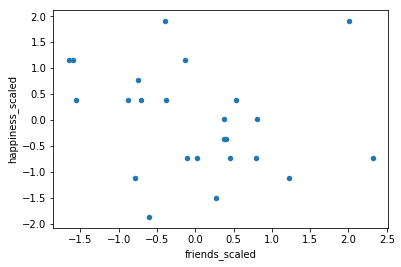

In [15]:
df_scaled.plot(kind='scatter', x = 'friends_scaled', y = 'happiness_scaled')

通过$z$分数将数据标准化后，我们得到了可以进一步分析的散点图。

> 数据标准化的作用不仅仅在于提高数据的可读性，也是模型优化的必要手段之一，因为很多机器学习算法对数据尺度非常敏感，需要我们提前对数据进行标准化。

##### 从数据中获得洞察：相关性
在本书中，我们将讨论`拥有数据`和`从数据中获得洞察`的区别。拥有数据只是成功进行数据科学过程的第一步。获取数据、清洗数据以及对数据可视化，只能帮你更好地用数据讲故事，不能揭示更深层次的问题。为了对Facebook数据做更深入的分析，我们将寻找用户好友数和幸福指数之间的关系。

我们已经对Facebook用户进行了抽样，统计了他们的社交情况和幸福指数。我们能否找出好友数和幸福指数之间的关系？

严谨地回答这个问题需要在实验室情境下进行，但是我们可以先从提出一个假设开始。 我们有以下3种观点：
+ 好友数和幸福指数正相关
+ 好友数和幸福指数负相关
+ 好友数和幸福指数没有任何相关性

我们可以用简单的统计学知识回答以上问题呢。`相关系数`(correlation coefficients)是描述两个变量之间相关性强弱关系的量化指标。两个数据集间的相关性描述了两者的变化关系。这一概念是机器学习模型的核心假设之一。对于大部分预测算法，它们能够正常工作的前提是变量之间确实存在某种关系或相关性。机器学习算法通过寻找这种关系进行准确的预测。 

相关系数的一些重要的内容如下：
+ 相关系数值介于`−1～1`
+ 相关系数绝对值越大(接近`−1`或`1`)，变量间的相关性越强
    - 最强的相关性为`−1`和`1`
    - 最弱的相关性为`0`
+ 正相关意味着一个指标增加，另一个指标也增加
+ 负相关意味着一个指标增加，另一个指标却下降

使用`Pandas`快速计算各个特征之间的相关系数：

In [16]:
df.corr()

,friends,happiness
friends,1.000000,-0.216199
happiness,-0.216199,1.000000


你需要牢记一些关于相关性的告诫：
+ 变量之间的相关性通常以线性关系进行计算。这意味着即便变量的相关系数为零，也不能说明变量不存在任何关系，而只能说明变量间没有线性关系，变量间可能着存在非线性关系
+ 变量间的相关性不等同于因果关系。虽然好友数和幸福指数呈微弱的负相关性，但并不意味着好友数的增加导致了幸福指数的减少。因果关系必须通过假设验证进行确认。后续我们将介绍具体的验证方法

简单总结，我们可以利用相关性对变量间的关系进行假设检验，但我们还需要更多复杂的统计学方法和机器学习算法，以便对假设进行验证。

## 7.5 经验法则
正态分布是一种呈钟形曲线的特殊概率分布：
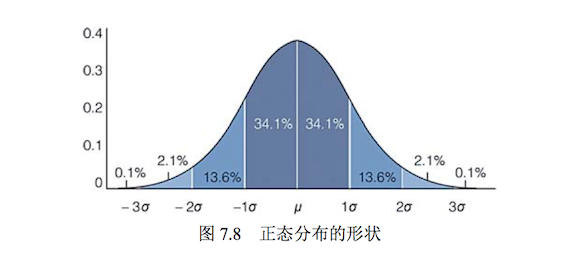

`经验法则`(the empirical rule)指我们可以推算出标准正态分布中每个标准差区间所含的数据量。

比如，根据经验法则：
+ 接近$68%$的数据点和均值相差1个标准差以内
+ 接近$95%$的数据点和均值相差2个标准差以内
+ 接近$99.7%$的数据点和均值相差3个标准差以内

下面我们看Facebook好友数据是否具有以上特征。我们用`DataFrame`分别找出和均值相差1个、2个和3个标准差的百分比：

In [17]:
# finding the percetage of people within one standard deviation of the mean
with_1_std = df_scaled[(df_scaled['friends_scaled'] <= 1) & (df_scaled['friends_scaled'] >= -1)].shape[0]
with_1_std / float(df_scaled.shape[0])

0.75

In [18]:
# finding the percetage of people within two standard deviation of the mean
with_1_std = df_scaled[(df_scaled['friends_scaled'] <= 2) & (df_scaled['friends_scaled'] >= -2)].shape[0]
with_1_std / float(df_scaled.shape[0])

0.9166666666666666

In [19]:
# finding the percetage of people within three standard deviation of the mean
with_1_std = df_scaled[(df_scaled['friends_scaled'] <= 3) & (df_scaled['friends_scaled'] >= -3)].shape[0]
with_1_std / float(df_scaled.shape[0])

1.0

从计算结果可以看出，数据集并不符合经验法则。接近$75\%$的用户和均值相差1个标准差以内，接近$92\%$的用户和均值相差2个标准差以内，所有用户和均值的距离都不超过3个标准差。

##### 案例：考试成绩
假设考试成绩呈正态分布，平均成绩84分，标准差6分。我们可以近似地认为： 
+ 接近$68\%$的人成绩在`78～90`分，因为78、90分别和84相差1个标准差
+ 假如我们想知道成绩介于`72～96`分的比例，由于72、96恰好和84相差2个标准差，那么根据经验法则，接近$95\%$的人成绩位于这个区间

在现实生活中，并不是所有的数据都呈正态分布，因此经验法则并不能解决所有问题。我们有另一种理论可以帮助我们分析任何一种分布。在下一章，我们将深入研究何时可以假设数据呈正态分布，因为统计检验和假设要求源数据呈正态分布。

> 当我们用$z$分数方法对数据进行标准化时，并不要求数据呈正态分布